In [5]:
import pandas as pd
import gzip as gz
import re
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [6]:
#DECLARACION DE FUNCIONES

#Debido a que 2 de los 3 archivos json tienen un error (las claves de los diccionarios usan comilla simple,
#cuando la sintaxis de json requiere que sean comillas dobles) se crea la funcion crear_dataframe_jason_error la cual toma por argumento
#la ruta para acceder al archivo json comprimido, descomprime el mismo como texto, separa las lineas creando una lista de lineas,
#itera por cada una de ellas convirtiendolas en diccionarios mediante la funcion eval y guardando cada uno de ellos en una lista
#de diccionarios, luego se crea un dataframe con pandas a partir de dicha lista de diccionarios el cual retorna la funcion.
def crear_dataframe_json_error(path):
    with gz.open(path, 'rt', encoding='utf-8') as archivo:
        dataset = archivo.read()

    lineas = dataset.strip().split('\n')
    lista_de_diccionarios = []
    for linea in lineas:
        diccionario = eval(linea)
        lista_de_diccionarios.append(diccionario)
    
    df = pd.DataFrame(lista_de_diccionarios)

    return df


#Funcion para imprimir un ejemplo no nulo de cada variable
def imprimir_ejemplos(df, variables = list):
    ejemplo = []
    titulo = []
    for elemento in variables:
        for valor in df[elemento]:
            flag = 0
            while valor != None and type(valor) != float:
                ejemplo.append(valor)
                titulo.append(elemento)
                flag = 1
                break
            while type(valor) == float and not math.isnan(valor):
                ejemplo.append(valor)
                titulo.append(elemento)
                flag = 1
                break
            if flag == 1:
                break
    for i in range(len(ejemplo)):
        print(titulo[i], ': ', ejemplo[i])

#Funcion analisis variables categoricas - Nube de palabras - Mas frecuentes
def repres_categoricas(df, columna = str):
    df[columna] = df[columna].astype(str)
    texto = '-'.join(df[columna])
    nube = WordCloud(width=1200, height=800, background_color='#ffffff').generate(texto)

    frecuencias = Counter(texto.split('-'))

    # Encontrar la palabra más repetida y su frecuencia
    palabra_mas_repetida = frecuencias.most_common(10)

    # Calcular el porcentaje de la palabra más repetida sobre el total de palabras
    total_palabras = sum(frecuencias.values())
    porcentajes = [(palabra, (frecuencia / total_palabras) * 100) for palabra, frecuencia in palabra_mas_repetida]


    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # Graficar los porcentajes
    plt.figure(figsize=(10, 5))
    palabras, porcentajes = zip(*porcentajes)
    plt.barh(palabras, porcentajes, color=['#1f77b4', '#ff7f0e', '#2ca02c',
                                        '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Porcentaje')
    plt.title('Porcentaje de las 10 Palabras más Repetidas sobre el total')
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más repetidas estén en la parte superior
    plt.show()

#Funcion graficar diagrama de caja    
def diagrama_caja(df, campo = str):
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=campo, data=df, orient='horizontal')
    plt.title(f'Diagrama de caja del campo: {campo}')
    plt.show()

#Funcion graficar dispersion
def dispersion(df, campo_x = str, campo_y = str):
    plt.scatter(df[campo_x], df[campo_y])
    plt.xlabel(campo_x)
    plt.ylabel(campo_y)
    plt.yticks([])
    plt.title(f'Dispersion {campo_x} - {campo_y}')
    plt.show()

#Funcion graficar histograma
def histograma(df, campo = str):
    sns.histplot(eliminar_outliers(df, campo), kde=True)
    plt.xlabel(campo)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {campo}')
    plt.show()


In [7]:
#Se crea el dataframe df_steam_games con pandas accediendo directamente al archivo json ya que el mismo esta correcto
steam_games = pd.read_json("C:/Users/eduen/AppData/Local/Temp/steam_games.json.gz", lines=True, compression='gzip')

#Se crea el dataframe df_user_reviews a partir del archivo json utilizando la funcion crear_dataframe_json_error
user_reviews = crear_dataframe_json_error("C:/Users/eduen/AppData/Local/Temp/user_reviews.json.gz")

#Se crea el dataframe df_users_items a partir del archivo json utilizando la funcion crear_dataframe_json_error
users_items = crear_dataframe_json_error("C:/Users/eduen/AppData/Local/Temp/users_items.json.gz")



DATASET STEAM_GAMES

In [8]:
steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [9]:
#Obtener informacion del dataset
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [10]:
#Clasificar en variables categoricas o numericas, luego almacenar en dos listas diferentes.
variables_categoricas = ['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'early_access', 'id', 'developer']

variables_numericas = ['price']

EJEMPLO NO NULO DE VARIABLES NUMERICAS

In [11]:
imprimir_ejemplos(steam_games, variables_numericas)


price :  4.99


EJEMPLO NO NULO DE VARIABLES CATEGORICAS

In [12]:
imprimir_ejemplos(steam_games, variables_categoricas)

publisher :  Kotoshiro
genres :  ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']
app_name :  Lost Summoner Kitty
title :  Lost Summoner Kitty
url :  http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/
release_date :  2018-01-04
tags :  ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']
reviews_url :  http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1
specs :  ['Single-player']
early_access :  0.0
id :  761140.0
developer :  Kotoshiro


ANALISIS UNIVARIABLE

Variables Categoricas:

Representacion visual utilizando nubes de palabras y porcentajes de las 10 palabras mas frecuentes en variables categoricas

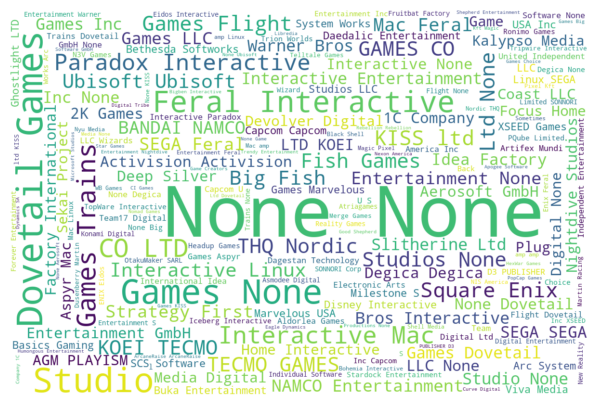

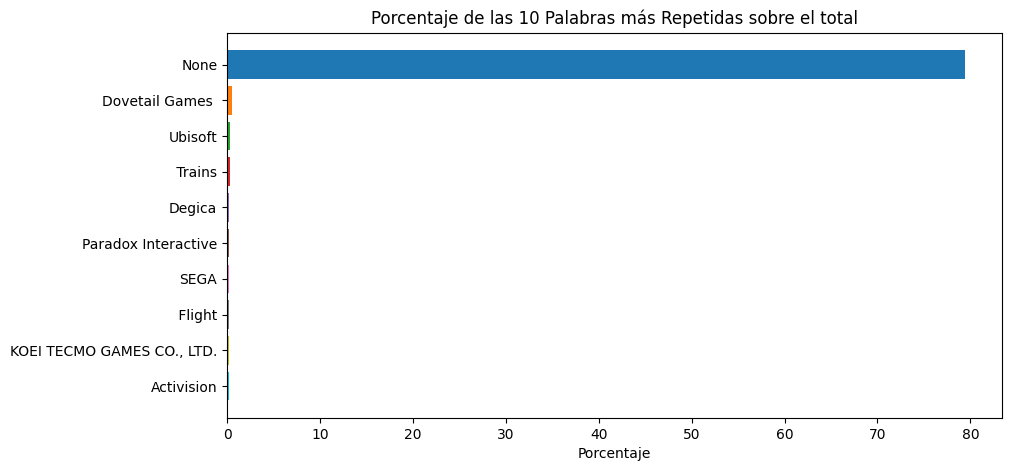

In [13]:
repres_categoricas(steam_games, 'publisher')

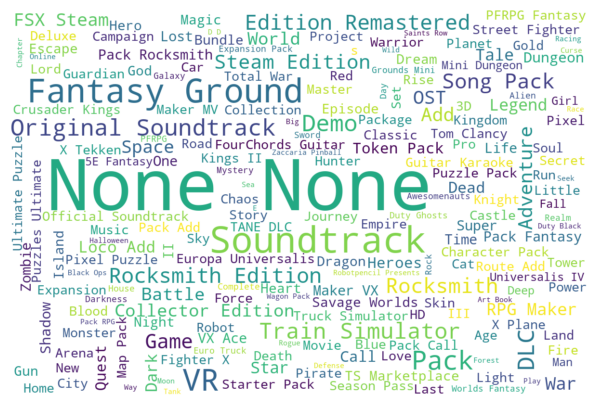

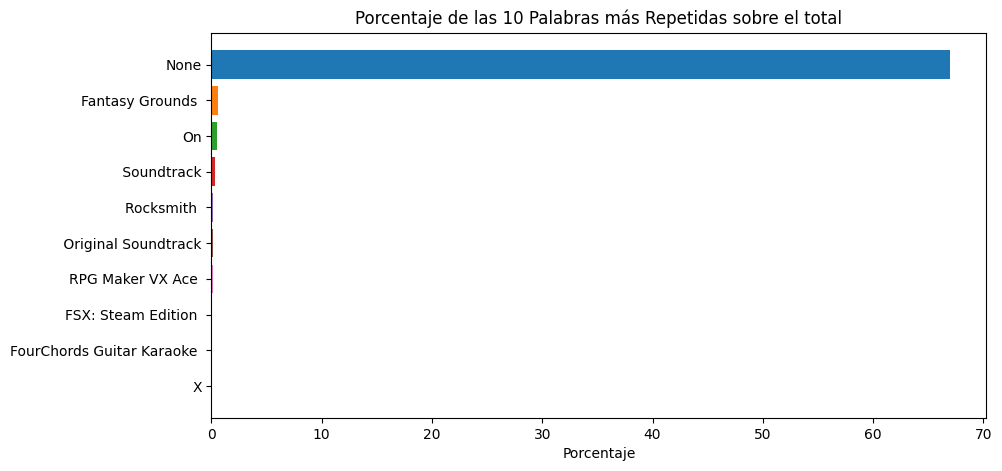

In [14]:
repres_categoricas(steam_games, 'app_name')

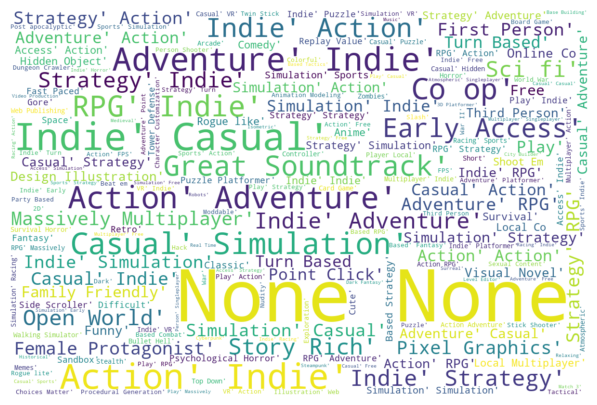

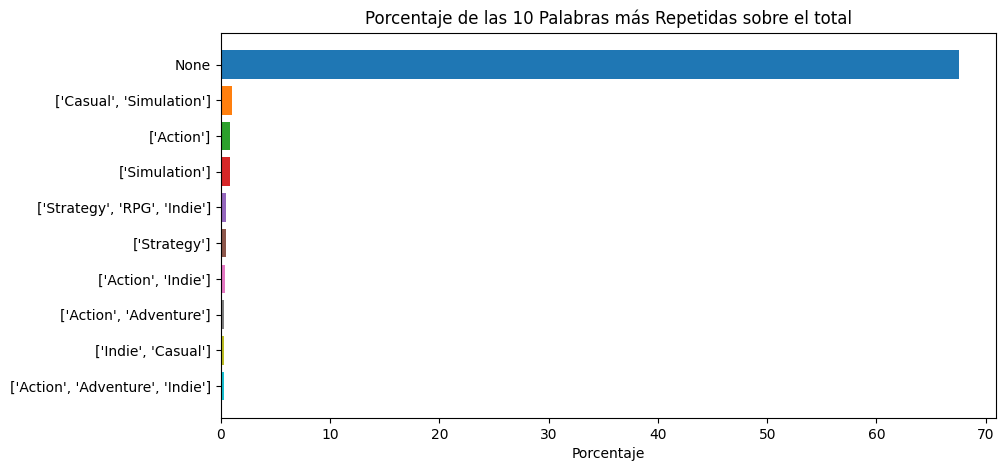

In [15]:
repres_categoricas(steam_games, 'tags')

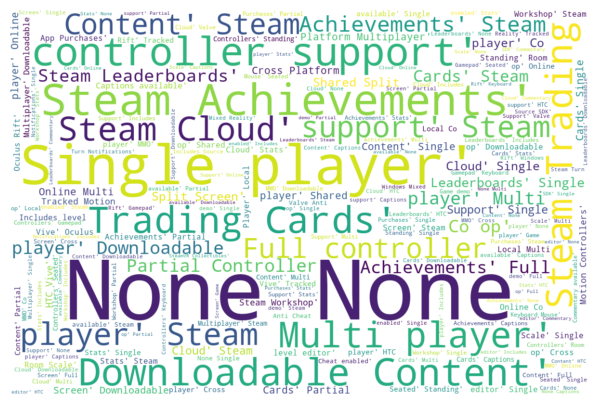

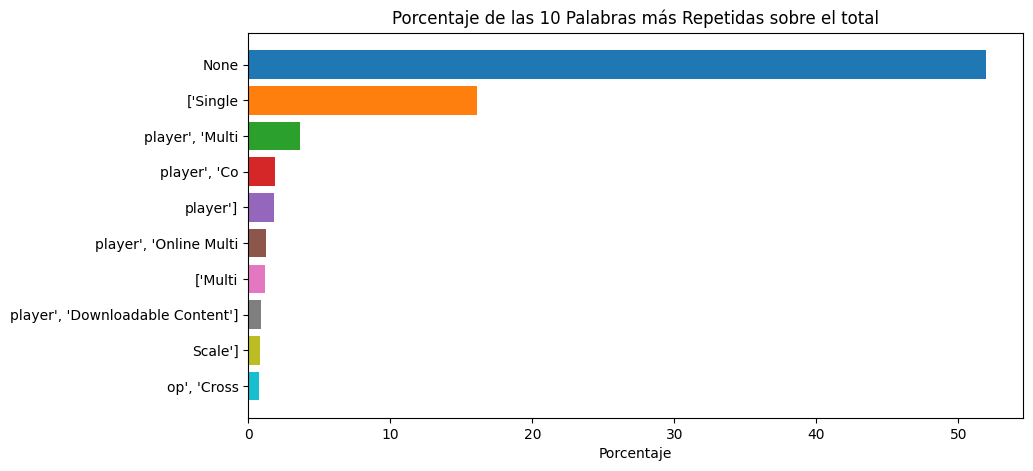

In [18]:
repres_categoricas(steam_games, 'specs')

c:\Users\eduen\Desktop\PI_DATAPT04\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eduen\Desktop\PI_DATAPT04\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eduen\Desktop\PI_DATAPT04\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24050 (\N{CJK UNIFIED IDEOGRAPH-5DF2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eduen\Desktop\PI_DATAPT04\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eduen\Desktop\PI_DATAPT04\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21551 (\N{CJK UNIFIED I

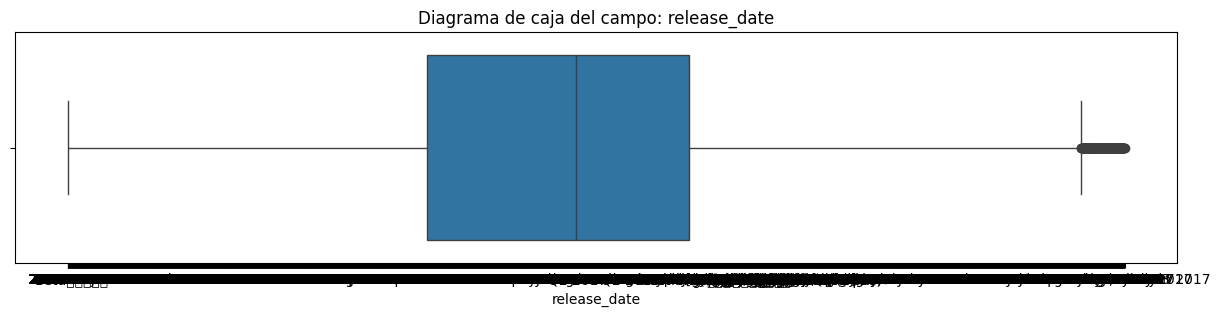

In [19]:
diagrama_caja(steam_games, 'release_date')

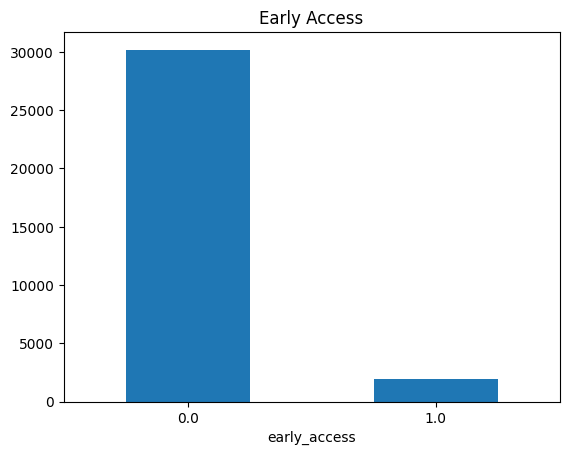

In [20]:
#Grafico de barras que arroja la frecuencia de los valores True y False del campo early_access
frecuencia = steam_games['early_access'].value_counts()
frecuencia.plot(kind='bar', rot=0)
plt.title('Early Access')
plt.show()

ANALISIS MULTIVARIABLE

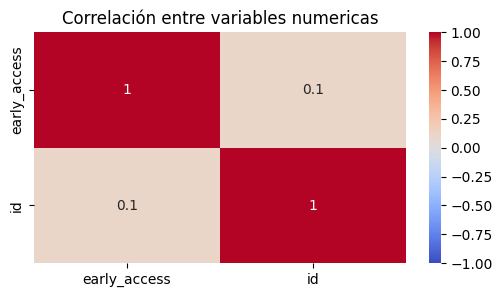

In [21]:
df = steam_games.select_dtypes(include=['number'])
matriz_correlacion = df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre variables numericas')
plt.show()

DATASET USER REVIEWS

In [25]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [26]:
imprimir_ejemplos(user_reviews, ['user_id', 'user_url', 'reviews'])

user_id :  76561197970982479
user_url :  http://steamcommunity.com/profiles/76561197970982479
reviews :  [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy th

DF USERS_ITEMS

In [27]:
users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [28]:
users_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [29]:
imprimir_ejemplos(users_items, ['user_id', 'items_count', 'steam_id', 'user_url', 'items'])

user_id :  76561197970982479
items_count :  277
steam_id :  76561197970982479
user_url :  http://steamcommunity.com/profiles/76561197970982479
items :  [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', 'playtime_fo